Plotting column 6...
Optimal parameters: [1.0000e+01 1.2485e+10 1.0000e+02 2.0000e+05]
Saved


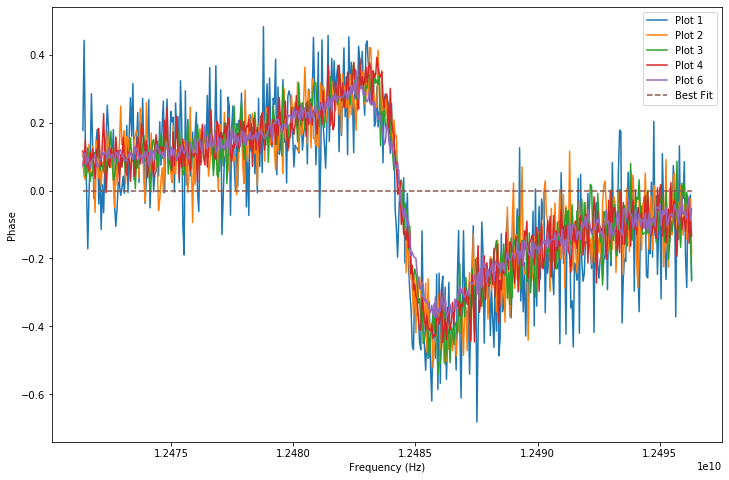

In [73]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# this function is the curve we wish to fit
# along with its relevant parameters
def fit(x, a, b, c, s):
    """
    a is the amplitude
    
    """
    return (1/x)*5*np.tan(x**2) 
#     return (a * np.tanh(-x) * np.exp(-np.abs(x)) + c)


def graph(filename, name):

    # load the data
    df = pd.read_csv(filename, header=None, skiprows=[0])
    df = df.to_numpy()

    X = df[:, 0]
    Y = df[:, 1:]

    # plot the raw data
    fig, ax = plt.subplots(figsize=(12, 8))

    for col in range(Y.shape[1]):

        # columns to skip
        if col+1 in [5, 7, 8, 9]:
            continue

        print(f"Plotting column {col+1}...", end='\r')
        ax.plot(X, Y[:, col], label=f"Plot {col+1}")

    # produce a guess for your parameters
    # NOTE manual guesses are better!
    A, B, C, S = 10, 1.2485e10, 100, 1e5

    # Gaussian best fit
    Y_hat = np.mean(Y, axis=1)

    # NOTE check out the documentation for curve_fit, its helpful
    opt, _ = curve_fit(fit, X, Y_hat, p0=[A, B, C, S])
    
    
    print("\nOptimal parameters:", opt)

    # plot the best fit
    ax.plot(X, fit(X, *opt), label=f"Best Fit", linestyle='--')

    # graph labelling
    plt.legend()
    

    plt.xlabel("Frequency (Hz)")
    plt.ylabel(name)

    plt.savefig(f"{name}.png")
    print("Saved")


if __name__ == "__main__":
    graph("Qubit data(phase).csv", name="Phase")


Plotting column 9...
Optimal parameters: [ 8.24298461e-02  1.24856016e+10 -4.26605433e+06]
Lower: 12481419050.17854
Upper: 12488441725.374794
Done!


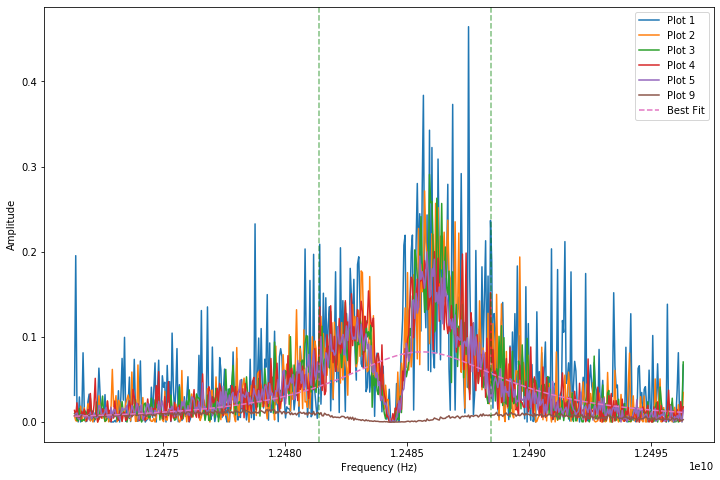

In [93]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


# this function is the curve we wish to fit
# along with its relevant parameters
def gaussian(x, a, x0, sigma):
    """
    a is the amplitude
    x0 is the mean
    sigma is the standard deviation
    """
    return a * np.exp(-(x-x0)**2/(2*sigma**2))
    


def lorentzian( x, a, x0, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)


def graph(filename, name):

    # load the data
    df = pd.read_csv(filename, header=None, skiprows=[0])
    df = df.to_numpy()

    X = df[:, 0]
    Y = df[:, 1:]**2

    # plot the raw data
    fig, ax = plt.subplots(figsize=(12, 8))

    for col in range(Y.shape[1]):

        # columns to skip
        if col+1 in [6, 7, 8]:
            continue

        print(f"Plotting column {col+1}...", end='\r')
        ax.plot(X, Y[:, col], label=f"Plot {col+1}")

    # produce a guess for your parameters
    # NOTE manual guesses are better!
    # curve_fit will then fine tune the values
    mean = 1.2484e10
    std = 1.5e5

    # Gaussian best fit
    Y_hat = np.mean(Y, axis=1)

    # NOTE check out the documentation for curve_fit, its helpful
    opt, _ = curve_fit(lorentzian, X, Y_hat, p0=[1, mean, std])

    print("\nOptimal parameters:", opt)

    # plot the best fit
    ax.plot(X, lorentzian(X, *opt), label=f"Best Fit", linestyle='--')

    # FWHM
    S = Y.sum(axis=1)

    spline = UnivariateSpline(X, S-np.max(S)/2, s=0)
    r = spline.roots()  # find the roots
    r1, r2 = r[0], r[-1]
    print(f"Lower: {r1}\nUpper: {r2}")

    plt.axvline(x=r1, color='g', linestyle="--", alpha=0.5)
    plt.axvline(x=r2, color='g', linestyle="--", alpha=0.5)


    # graph labelling
    plt.legend()
    

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")

    plt.savefig(f"{name}.png")
    print("Done!")


if __name__ == "__main__":
    graph("Qubit data(phase).csv", name="Phase")


Plotting column 6...
Optimal parameters: [ 0.06556831 12.48995883 -0.18297577  1.0004777 ]
Done!


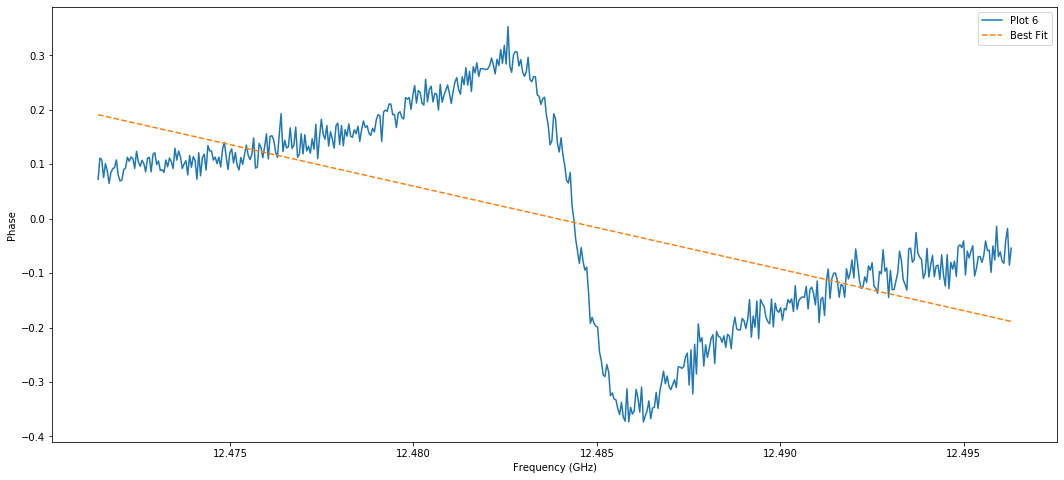

In [214]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

from scipy import signal


# this function is the curve we wish to fit
# along with its relevant parameters
def fit(x, a, b, c, s):
    """
    a is the amplitude
    """
    x = x/s - b
#     return ((1/x)*3*np.tanh(x**2))
    return ((1/a)*np.tanh(x**2) * (-1/x) + c)
#     return (1/a) * np.tanh(b * x) 

def graph(filename, name):

    # load the data
    df = pd.read_csv(filename, header=None, skiprows=[0])
    df = df.to_numpy()

    X = df[:, 0] / 1e9
    Y = df[:, 1:] 
    
    # plot the raw data
    fig, ax = plt.subplots(figsize=(18, 8))

    for col in range(Y.shape[1]):

        # columns to skip
        if col+1 in [1,2,3,4,5,7, 8, 9]:
            continue

        print(f"Plotting column {col+1}...", end='\r')
        ax.plot(X, Y[:, col], label=f"Plot {col+1}")

    # produce a guess for your parameters
    # NOTE manual guesses are better!
    A, B, C, S = 12, 12.485, 0, 1

    # Gaussian best fit
    Y_hat = np.mean(Y, axis=1)

    # NOTE check out the documentation for curve_fit, its helpful
    opt, _ = curve_fit(fit, X, Y_hat, p0=[A, B, C, S])

    print("\nOptimal parameters:", opt)

    # plot the best fit
    ax.plot(X, fit(X, *opt), label=f"Best Fit", linestyle='--')


    # graph labelling
    plt.legend()
   
    plt.xlabel("Frequency (GHz)")
    plt.ylabel(name)

    plt.savefig(f"{name}.png")
    print("Done!")


if __name__ == "__main__":
    graph("Qubit data(phase).csv", name="Phase")


Sine funcion coefficients:
[0.61773698 0.78268428]
Covariance of coefficients:
[[ 2.75703958 -0.08675349]
 [-0.08675349  0.2248835 ]]


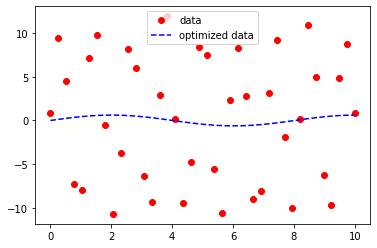

In [196]:
import numpy as np 
from scipy.optimize import curve_fit 
  
from matplotlib import pyplot as plt 
  
x = np.linspace(0, 10, num = 40) 
  
# The coefficients are much bigger. 
y = 10.45 * np.sin(5.334 * x) + np.random.normal(size = 40) 
  
def test(x, a, b): 
    return a * np.sin(b * x) 
  
param, param_cov = curve_fit(test, x, y) 
  
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = (param[0]*(np.sin(param[1]*x))) 
  
plt.plot(x, y, 'o', color ='red', label ="data") 
plt.plot(x, ans, '--', color ='blue', label ="optimized data") 
plt.legend() 
plt.show()